In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Kaggale_new\Day1\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
#Dividing Data(df) into independent and dependent data
x = df[['YearsExperience']] #independent (data frame/column with index/2D)
y= df['Salary'] #dependent (output/ series data)

In [6]:
(x.shape, y.shape)

((30, 1), (30,))

In [7]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.20, random_state = 30)

In [8]:
x_train.shape, x_test.shape

((24, 1), (6, 1))

In [9]:
y_train.shape, y_test.shape

((24,), (6,))

In [10]:
#standard scaling is used to scale down the data to standard format i.e. where mean = 0, S.D =1
#we transform only the test data and in train data we do fit_transform
#Apply standscaler to independent data and not on dependent data(output data)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
x_train=scaler.fit_transform(x_train)

In [12]:
x_test=scaler.transform(x_test)

In [13]:
x_test

array([[-0.05521372],
       [ 2.04940354],
       [ 1.73760839],
       [-0.44495766],
       [ 1.42581324],
       [-1.53624069]])

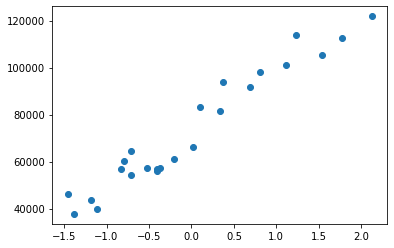

In [14]:
plt.scatter(x_train, y_train)

In [15]:
#Model Training

from sklearn.linear_model import LinearRegression

In [16]:
#object created
regression = LinearRegression()

In [17]:
#training the train data
#fit is used to fit the linear model on the training data

regression.fit(x_train, y_train)

LinearRegression()

In [18]:
#to find the intercept i.e. m in y=mx+c
regression.intercept_

73366.66666666667

In [19]:
#to find the coefficient i.e. c in y=mx+c
regression.coef_

array([24326.32470022])

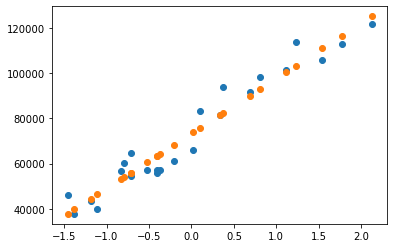

In [20]:
#to see the best fit line
#if we use plt.plot in second line then we get the straight line and we can provide color to it also
plt.scatter(x_train, y_train)
plt.scatter(x_train, regression.predict(x_train))

In [21]:
#prediction for the test data
y_pred_test = regression.predict(x_test)
y_pred_test

array([ 72023.51967848, 123221.12252239, 115636.29247144,  62542.48211479,
       108051.46242049,  35995.57693647])

In [22]:
y_test

15     67938
28    122391
26    116969
10     63218
24    109431
0      39343
Name: Salary, dtype: int64

In [23]:
#performance metrics MSE, MAE, RMSE
# with above functions we can find the difference between Y_pred_test and y_test

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5453562.219148241
1941.8047096136736
2335.2863248750123


In [25]:
#Accuraccy of the model
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred_test)
score

0.9944092048209745